In [50]:
import importlib
import theano.tensor as T
import sys, os
sys.path.append("/home/bl3/PycharmProjects/GeMpy/GeMpy")
sys.path.append("/home/bl3/PycharmProjects/GeMpy/pygeomod/pygeomod")
sys.path.append("/home/miguel/PycharmProjects/GeMpy/GeMpy")
import GeoMig
#import geogrid
#importlib.reload(GeoMig)
importlib.reload(GeoMig)


import numpy as np
%matplotlib inline
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
np.set_printoptions(precision = 4, linewidth= 300, suppress =  True)
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

In [51]:
test = GeoMig.Interpolator(c_o = 17*17/14/3, range_var = 17, nugget_effect= 0.01, u_grade = 9
                          )
test.set_extent(0,10,0,10,0,10)
test.set_resolutions(40,10,40)
test.create_regular_grid_3D()
test.theano_compilation_3D();
#test.theano_set_3D_nugget_degree0()

/home/miguel/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: DeprecationWarning: stack(*tensors) interface is deprecated, use stack(tensors, axis=0) instead.


In [52]:
layer_1 = np.array([[0.5,4,7], [2,4,6], [4,4,7], [5,4,5], [8,4,7], [7,4,8], [1,5,7]], dtype = "float64")#-np.array([5,5,4]))/8+0.5
layer_2 = np.array([[3,5,5]])#, [6,5,4]])
layer_3 = np.array([[1,5,1],[1,5,2],[6,5,3]], dtype = "float64")#- np.array([5,5,4]))/8+0.5

dip_pos_1 = np.array([5,5,7], dtype = "float64")#- np.array([5,5,4]))/8+0.5
dip_pos_2 = np.array([7.,5,2], dtype = "float64")
dip_pos_3 = np.array([8,4,5], dtype = "float64")
dip_angle_1 = float(15)
dip_angle_2 = float(230)


layers = np.asarray([layer_1,layer_2])#,np.array([[2,5,11],[3,1,2],[6,2,1]])])
test.layers = np.asarray([layer_1,layer_2])
dips = np.asarray([dip_pos_1, dip_pos_2])#, dip_pos_3])
dips_angles = np.asarray([dip_angle_1, dip_angle_2], dtype="float64")
azimuths = np.asarray([90,90], dtype="float64")
polarity = np.asarray([1,1], dtype="float64")
#print (dips_angles)
rest = np.vstack((i[1:] for i in layers))
ref = np.vstack((np.tile(i[0],(np.shape(i)[0]-1,1)) for i in layers))
dips_angles.dtype
rest = rest.astype("float64")
ref = ref.astype("float64")

test.azimuths = azimuths
test.dips_angles = dips_angles
test.polarity = polarity
test.dips = dips.astype("float32")
test.azimuths = azimuths
test.dips_angles = dips_angles
test.polarity = polarity
test.dips = dips.astype("float32")
dips_angles = dips_angles.astype("float32")
type(dips_angles)
#test.G_x,test.G_y,test.G_z = test.interpolate(test.dips,dips_angles,
#                                              azimuths,polarity, rest, ref)[-3:]
rest, ref;

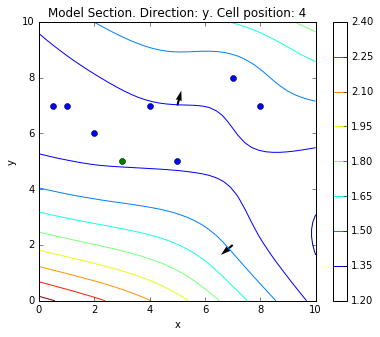

In [53]:
par2 = 1/(7.5**2)
w = 1/7.5
test.potential_field = test.interpolate(dips,dips_angles,azimuths,polarity, rest, ref,
par2, w)[0].reshape(40,10,40)
test.potential_field = np.swapaxes(test.potential_field,0,1)

test.azimuths = azimuths
test.dips_angles = dips_angles
test.polarity = polarity
test.dips = dips.astype("float32")
test.calculate_gradient()
test.plot_potential_field_2D(direction="y", cell_pos = 4, figsize = (6.2,5), colorbar = True)

In [36]:
%%timeit
test.interpolate(dips,dips_angles,azimuths,polarity, rest, ref,
par2, w)[2]

100 loops, best of 3: 8.62 ms per loop


# theano_set_3D_nugget_degree0

In [276]:
par2 = 1/49*10**2/14/3
par3 = 10**2/14/3
par4 = 10000
w = 1/7
nugget = 0.01
par5 = par3

CG = test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,
par2,par3,par4,nugget,w,par5)[2]

G = np.concatenate(test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,
par2,par3,par4,nugget,w,par5)[-3:])
G = np.append(G,[0,0,0,0])

CG,np.linalg.solve(CG,G), 10**2/14/3, test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,
par2,par3,par4,nugget,w,par5)[3:6]


AttributeError: 'Interpolator' object has no attribute 'geoMigueller'

In [578]:
par2 = 1/49*10**2/14/3
par3 = 10**2/14/3
par4 = 10000
w = 1/7
nugget = 0.01
par5 = par3

CG = test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,
par2,par3,par4,nugget,w,par5)[2]

G = np.concatenate(test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,
par2,par3,par4,nugget,w,par5)[-3:])
G = np.append(G,[0,0,0])

CG,np.linalg.solve(CG,G)


(array([[ 0.3433333, -0.0402997,  0.       ,  0.       ,  0.       ,  0.0568688,  0.071785 ,  0.0406363,  0.0116067],
        [-0.0402997,  0.3433333,  0.       ,  0.       ,  0.0568688,  0.       ,  0.01569  ,  0.0185298,  0.0111249],
        [ 0.       ,  0.       ,  0.3433333,  0.0177296,  0.       ,  0.       ,  0.       ,  0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.0177296,  0.3433333,  0.       ,  0.       ,  0.       ,  0.       ,  0.       ],
        [ 0.       ,  0.0568688,  0.       ,  0.       ,  0.3433333, -0.0380017, -0.0033193,  0.0052824,  0.025695 ],
        [ 0.0568688,  0.       ,  0.       ,  0.       , -0.0380017,  0.3433333,  0.0415711,  0.0659872,  0.0270434],
        [ 0.071785 ,  0.01569  ,  0.       ,  0.       , -0.0033193,  0.0415711,  0.0928308,  0.0218988,  0.0382586],
        [ 0.0406363,  0.0185298,  0.       ,  0.       ,  0.0052824,  0.0659872,  0.0218988,  0.0738353,  0.0280381],
        [ 0.0116067,  0.0111249,  0.       ,  0.       ,

In [532]:
# Printing SED
par2 = 10**2/14/3
par3 = 10**2/14/3
par4 = 10000
w = 1
nugget = 0.01
par5 = par3

s1 = test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,
par2,par3,par4,nugget,w,par5)[-4]

s2 = test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,
par2,par3,par4,nugget,w,par5)[-3]

s3 = test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,
par2,par3,par4,nugget,w,par5)[-2]

s4 = test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,
par2,par3,par4,nugget,w,par5)[-1]

s1,s2,s3,s4

(array([[ 0.3433333,  0.       ,  0.       ],
        [ 0.       ,  0.3433333,  0.       ],
        [ 0.       ,  0.       ,  0.3433333]]),
 array([ 0.]),
 array([ 0.]),
 array([ 1.]))

In [533]:
test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,
par2,par3,par4,nugget,w,par5)[0];

In [546]:
# Calculating a,b,c
l1 = -0.0448251
l3 = 2.9136523
l4 = 0.130866
a = -0.3433333*l1/l4
b = (-0.3433333*l3+1)/l4
c = (-a*l1-b*l3)/l4
a,b,c,0.3433333*l3

(0.11760082455206088,
 -0.0027039812601433845,
 0.10048392965630686,
 1.00035385921159)

In [512]:
0.7056028/0.0162278, 0.0162278/0.7056028, 0.1176058/0.0027041, 3.6179315/0.0199456, 0.0199456/3.6179315

(43.48111265852426,
 0.02299849150258474,
 43.491660811360525,
 181.3899556794481,
 0.005512984422176042)

In [513]:
181.3899556794481/43.491660811360525, 43.491660811360525/10**2/14/3

(4.170683581530805, 0.01035515733603822)

In [549]:
0.7056028/0.1176058  ,0.0162278/0.0027041, 3.6179315/0.1, 180/6

(5.999727904576135, 6.0011833881883065, 36.179314999999995, 30.0)

In [515]:
test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,
par2,par3,par4,nugget,w,par5)[5]

array([[-4. ],
       [ 0. ],
       [-0.1]])

In [548]:
a = 0.11760583830047379
b = -0.0027041052391104997
c = 0.1


CG[0,-1] = a
CG[-1,0] = a
CG[-1,2] = b
CG[2,-1] = b
CG[-1,-1] = c
CG
CG,np.linalg.solve(CG,G)

(array([[ 0.3433333,  0.       ,  0.       ,  0.1176058],
        [ 0.       ,  0.3433333,  0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.3433333, -0.0027041],
        [ 0.1176058,  0.       , -0.0027041,  0.1      ]]),
 array([-0.0451951,  0.       ,  2.9136605,  0.1319405]))

In [320]:
test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,
par2,par3,par4,nugget,w,par5)[5]


array([[ 1. ],
       [ 0. ],
       [-0.1]])

In [273]:
CG[-1,0] 

0.70560282216813985

In [114]:
np.linalg.solve(CG,G)

array([ -1.2509447e+02,   1.2598659e+02,  -2.6021510e+16,  -2.6021510e+16,   2.6021510e+16,   2.6021510e+16])

In [307]:
test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,
10000,par3,par4,nugget,w,par5)[8]

array([[ 0.2402344]])

In [6]:
c_sol_ult = np.array([
           -0.154971249149853,
           0,
           3.3634073049185047,
           1.6440930894388599, -2.208027365601707
    ])
c_sol_17 =np.array([   -0.07519608514102089913411219868066837079823017120361328125,
                   0,
                   3.33264951481644633446421721600927412509918212890625,
                 1.3778510792932487927231477442546747624874114990234375,
                   -2.295940519242440469582788864499889314174652099609375,
                ])

In [7]:
test.a.get_value()

array(10)

In [8]:
((10/8)**2)/14/3

0.03720238095238095

In [9]:
par2 = 10**2/14/3
par3 = -10**2/14/3
par4 = 10**2/14/3
w = 1
nugget = +0.0
par5 = 0.05
print (par3)
test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,
par2,par3,par4,nugget,w,par5)[2],test.geoMigueller(
    dips,dips_angles,azimuths,polarity, rest, ref,
        par2, par3,par4,nugget,w,par5)[1], c_sol_ult


-2.380952380952381


(array([[  0.3333333, -17.       ,   0.       ,  -0.1055376,   0.       ,  -0.1055376,  -0.6698832,  -0.6535275],
        [-17.       ,   0.3333333,  -0.1055376,   0.       ,  -0.1055376,   0.       ,   0.4575668,  -0.31093  ],
        [  0.       ,  -0.1055376,   0.3333333,  -0.4388709,   0.       ,  -0.1055376,   0.       ,   0.       ],
        [ -0.1055376,   0.       ,  -0.4388709,   0.3333333,  -0.1055376,   0.       ,   0.       ,  -0.       ],
        [  0.       ,  -0.1055376,   0.       ,  -0.1055376,   0.3333333,  -0.4388709,  -0.3757607,   0.7381629],
        [ -0.1055376,   0.       ,  -0.1055376,   0.       ,  -0.4388709,   0.3333333,   0.1249598,  -0.4532622],
        [ -0.6698832,   0.4575668,   0.       ,   0.       ,  -0.3757607,   0.1249598,   0.2356175,   0.0234217],
        [ -0.6535275,  -0.31093  ,   0.       ,  -0.       ,   0.7381629,  -0.4532622,   0.0234217,   0.1808966]]),
 array([ -0.006865 ,  -0.9713807, -23.9041609, -26.1750064,  16.7387148,  34.3186982, 

In [2193]:
np.linalg.solve(CG,G)

array([  4.3354653e-03,   7.0328993e-03,   1.4323343e+16,   1.4323343e+16,  -1.4323343e+16,  -1.4323343e+16])

In [1990]:
test.geoMigueller(test.dips,dips_angles,azimuths,polarity, rest, ref,
                                 a,0,c,-0.333,8*a,f)[-1]

array([ 1.])

In [545]:

test.c_o.set_value(14)
test.nugget_effect_grad.set_value(-0.3)

test.potential_field =  test.interpolate(test.dips,dips_angles,
                            azimuths,polarity, rest, ref)[0].reshape(10,10,10)
test.interpolate(dips,dips_angles,azimuths,polarity, rest, ref)[1][:,0]

AttributeError: 'Interpolator' object has no attribute 'interpolate'

/home/bl3/PycharmProjects/GeMpy/Visualization.py:157: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  grid_slice = self.potential_field[pos, :, :]


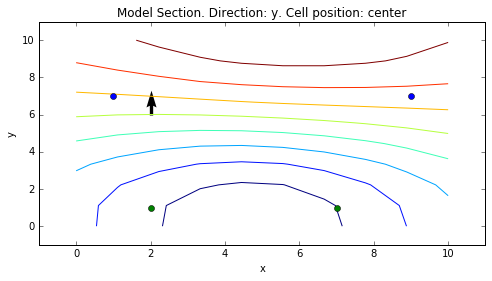

In [120]:
test.plot_potential_field_2D(direction = "y")

In [ ]:
c_sol=np.array([   -0.07519608514102089913411219868066837079823017120361328125,
                   0,
                   3.33264951481644633446421721600927412509918212890625,
                 1.3778510792932487927231477442546747624874114990234375,
                   -2.295940519242440469582788864499889314174652099609375,
                ])

In [43]:
# Calculation of gradients
G_x = np.sin(np.deg2rad(dips_angles)) * np.sin(np.deg2rad(azimuths)) * polarity
G_y = np.sin(np.deg2rad(dips_angles)) * np.cos(np.deg2rad(azimuths)) * polarity
G_z = np.cos(np.deg2rad(dips_angles)) * polarity

G_x, G_y, G_z

(array([ 0.], dtype=float32),
 array([ 0.173648178577423], dtype=float32),
 array([ 0.984807729721069], dtype=float32))

In [8]:
_,h1 = np.argmin((abs(test.grid - ref[0])).sum(1)), test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref)[0][np.argmin((abs(test.grid - ref[0])).sum(1))]
_, h2 =np.argmin((abs(test.grid - ref[1])).sum(1)), test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref)[0][np.argmin((abs(test.grid - ref[1])).sum(1))]

TypeError: Missing required input: <TensorType(float64, scalar)>

In [586]:
# Gradients check
G_x, G_y, G_z = test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref)[-3:]
G_x, G_y, G_z;

TypeError: Missing required input: <TensorType(float64, scalar)>

In [14]:
# Plotting function
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cmx

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
h =  np.array([h1,h2])
cm = plt.get_cmap("jet")
cNorm = matplotlib.colors.Normalize(vmin=h.min(), vmax=h.max())
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)


sol = test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref)[0].reshape(200,200,200,
    order = "C")[:,:,:]
#sol = np.swapaxes(sol,0,1)


from skimage import measure
isolines = np.linspace(h1,h2,2)
#vertices = measure.marching_cubes(sol, isolines[0], spacing = (0.2,0.2,0.2),
#    gradient_direction = "descent")[0]
for i in isolines[0:10]:
    vertices = measure.marching_cubes(sol, i, spacing = (0.05,0.05,0.05),
    gradient_direction = "ascent")[0]

    ax.scatter(vertices[::40,0],vertices[::40,1],vertices[::40,2],color=scalarMap.to_rgba(i),
     alpha = 0.2) #color=scalarMap.to_rgba(vertices[::10,2])
ax.scatter(layers[0][:,0],layers[0][:,1],layers[0][:,2], s = 50, c = "r" )
ax.scatter(layers[1][:,0],layers[1][:,1],layers[1][:,2], s = 50, c = "g" )
ax.quiver3D(dips[:,0],dips[:,1],dips[:,2], G_x,G_y,G_z, pivot = "tail", linewidths = 2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_zlim(0,10)
#ax.scatter(simplices[:,0],simplices[:,1],simplices[:,2])

NameError: name 'h1' is not defined

In [16]:
c_sol = np.array(([-7.2386541205560206435620784759521484375E-14],
            [-1.5265566588595902430824935436248779296875E-14],
            [-1.154631945610162802040576934814453125E-14],
            [6.21724893790087662637233734130859375E-15],
            
            [-5.9952043329758453182876110076904296875E-15],
            [7.99360577730112709105014801025390625E-15],
            
            [2.220446049250313080847263336181640625E-15],
            [-3.641531520770513452589511871337890625E-14],
            [8.0380146982861333526670932769775390625E-14],
            
            
            [0.8816416857576581111999303175252862274646759033203125],
            [9.355249580684368737593104015104472637176513671875],
            [-0.1793850547262900996248191631821100600063800811767578125],
        
            [0.047149729032205163481439313954979297704994678497314453125],
            [-8.994519501910499315044944523833692073822021484375],
           [ 0.4451793036427798000431721447966992855072021484375],
            
            [-1.7549816402777651536126768405665643513202667236328125],
            [0.0920938443689063301889063950511626899242401123046875],
            [0.36837537747562587586713789278292097151279449462890625])).squeeze()

In [17]:
c_sol.squeeze()

array([-0.000000000000072, -0.000000000000015, -0.000000000000012,  0.000000000000006, -0.000000000000006,  0.000000000000008,  0.000000000000002, -0.000000000000036,  0.00000000000008 ,  0.881641685757658,  9.355249580684369, -0.17938505472629 ,  0.047149729032205, -8.994519501910499,
        0.44517930364278 , -1.754981640277765,  0.092093844368906,  0.368375377475626])

In [1075]:
# Geomodeller solutions
# this is correct
c_sol_17 =np.array([   -0.07519608514102089913411219868066837079823017120361328125,
                   0,
                   3.33264951481644633446421721600927412509918212890625,
                 1.3778510792932487927231477442546747624874114990234375,
                   -2.295940519242440469582788864499889314174652099609375,
                ])

c_sol_100= np.array([-0.0137274193697543359,
          0,
          3.0568482261959,
          1.2783812756016,
         -2.051133867308])

# this is correct
c_sol_10 = np.array([-0.151502417422,
                 0,
                 3.3353696310127,
                 1.6023015420914,
                  -2.111778593772])
,
c_sol_10_90 = np.array([0.419745323675709047783,
                    -1.06527926020528126070109E-10,
                        3.25838975306877864923,
                        1.22202703670627732535,
                       -2.1228757261714990001]
)
c_sol_10_2dips = np.array([ -0.451454922983293982508001,
                               -1.716482167839337824588,
                               -3.978534821682584707878E-10,
                               9.4238070915992040076531E-10,
                               2.7910108234647372782433,
                               2.0918189335108881010683,
                               2.7639520139409876620106,
                               0.2536147925783167056401
                               ,]
)

c_sol_10_2dips = np.array(   [  
    -0.49345757792304362210344947925477754,
    -1.761009665135806256941464198462199,
                               0,
                               0,
    2.788719784344781960072623405721969902,
                               2.152601573628609710198134052916429936,
    2.693816367628854013815953294397331774,
                               0.371681174428028004985691268302616663
        ]
)

In [1139]:
test.set_extent(0,1000,0,1000,0,1000)
test.a.set_value(10)
test.geoMigueller(test.dips,dips_angles,azimuths,polarity, rest, ref,
                                 a,0,c,-0.333,8*a,f)[1]

array([ 0.2751876, -0.4061222,  0.       , -0.       ,  2.9573806,  2.9478294,  0.       ,  0.       ])

In [1884]:
test.a.get_value()

array(17)

In [1926]:
import pymc as pm
a = pm.Uniform('a', lower=-2, upper=1, value = 0.1 )
b = pm.Uniform('b', lower=-5, upper=1,) 
c = pm.Uniform('c', lower=-100, upper=10, )
d = pm.Uniform('d', lower=-10, upper=10, value = -0.3333)
e = pm.Uniform('e', lower=-1.1, upper=10, value = 0.8 )
f = pm.Uniform('f', lower=-1.1, upper=1.1, value = 0.26666 )

@pm.deterministic
def this(value = 0, a = a ,b = b,c = c,d = d,e= e,f =f):
    sol = test.geoMigueller(test.dips,dips_angles,azimuths,polarity, rest, ref,
                                 0.17,-17**2/14/3,c,0,1,f)[1]

    
    #error = abs(sol-c_sol)
    #print (c_sol_10_2dips, sol)
    return sol
  
like= pm.Normal("likelihood", this, 1./np.square(1e-40),
                value = c_sol_17, observed = True, size = len(c_sol_17)
)
model = pm.Model([a,b,c,d,e,f, like])    


In [1927]:
M = pm.MAP(model)
M.fit()

In [1928]:
print(
    "\n a",a.value,
    "\n b grad-> c_o GI",b.value,
    "\n c -> does not exist", c.value,
    "\n d -> nugeet", d.value,
    "\n e", e.value,
    "\n f",f.value)
this.value, c_sol_17,  c.value/a.value


 a 0.913889094088089 
 b grad-> c_o GI -1.1698406036282463 
 c -> does not exist 1.667240943495916 
 d -> nugeet 4.842557923091684 
 e 5.9758579230916835 
 f 0.2666600153917905


(array([-0.0705317,  0.       ,  3.5114214,  1.3749774, -2.2858536]),
 array([-0.0751961,  0.       ,  3.3326495,  1.3778511, -2.2959405]),
 1.8243361850811317)

In [1909]:
1.42/0.29

4.8965517241379315

In [1604]:
100/14/3

2.380952380952381

In [1107]:
print(
    "\n a",a.value,
    "\n b",b.value,
    "\n c", c.value,
    "\n d", d.value,
    "\n e", e.value,
    "\n f",f.value)
this.value, c_sol_10_2dips, e.value/a.value


 a 0.03272646249607133 
 b 4.340541758616873 
 c -2.9289777269071533 
 d -0.3332999994834254 
 e 0.2666603386193912 
 f 0.4518112464994274


(array([-0.4184992, -1.4753301,  0.       , -0.       ,  2.6729624,  2.1791451,  2.9671365, -0.38316  ]),
 array([-0.4934576, -1.7610097,  0.       ,  0.       ,  2.7887198,  2.1526016,  2.6938164,  0.3716812]),
 8.1481565155843718)

In [1326]:
17**2/(14)

20.642857142857142

In [1259]:
par2 = 0.00033333 * 17**2
test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,
                                 par2,1000,400000,-6,par2,1)[1], c_sol_17

(array([-0.0002912,  0.       ,  2.0019161,  0.0995984, -0.1741046]),
 array([-0.0751961,  0.       ,  3.3326495,  1.3778511, -2.2959405]))

In [1331]:
par2 = 17**2/(14)
w = 0.15
print (par2)
test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,
par2,par2,1,-1.01,w*par2,1)[2],test.geoMigueller(
    dips,dips_angles,azimuths,polarity, rest, ref,
        par2,par2,1,1.01,w*par2,1)[1], c_sol_17

20.642857142857142


(array([[   1.01     ,   -0.       ,   -0.       ,  100.142353 ,   41.7259804],
        [  -0.       ,    1.01     ,   -0.       ,    0.       ,    0.       ],
        [  -0.       ,   -0.       ,    1.01     ,  -33.3807843,   17.283467 ],
        [ 100.142353 ,    0.       ,  -33.3807843,   40.8560786,    4.0613267],
        [  41.7259804,    0.       ,   17.283467 ,    4.0613267,   31.3674665]]),
 array([-0.007551 ,  0.       , -0.0347269, -0.0129317,  0.0308534]),
 array([-0.0751961,  0.       ,  3.3326495,  1.3778511, -2.2959405]))

In [1325]:
par2 = 17**2/(14*3)
w = -11
print (par2)
test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,
par2,1000,400000,-0.01,w*par2,1)[2], test.geoMigueller(
    dips,dips_angles,azimuths,polarity, rest, ref,
        par2,1000,400000,-0.34,w*par2,1)[1], c_sol_17

6.880952380952381


(array([[  1.0000000e-02,  -0.0000000e+00,  -0.0000000e+00,  -1.2698298e+08,  -5.2909574e+07],
        [ -0.0000000e+00,   1.0000000e-02,  -0.0000000e+00,  -0.0000000e+00,  -0.0000000e+00],
        [ -0.0000000e+00,  -0.0000000e+00,   1.0000000e-02,   4.2327659e+07,  -2.1915863e+07],
        [ -1.2698298e+08,  -0.0000000e+00,   4.2327659e+07,   1.3618693e+01,   1.3537756e+00],
        [ -5.2909574e+07,  -0.0000000e+00,  -2.1915863e+07,   1.3537756e+00,   1.0455822e+01]]),
 array([-0.,  0., -0.,  0., -0.]),
 array([-0.0751961,  0.       ,  3.3326495,  1.3778511, -2.2959405]))

In [1215]:
for i in range(0,5):
    print (i, round((-0.3333-0.01*i),3), 
           test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,
                                 par2,0,1,-0.3333*i,-8*par2,1)[1],)

LinAlgError: Singular matrix
Apply node that caused the error: MatrixInverse(IncSubtensor{InplaceSet;int64:int64:, int64:int64:}.0)
Toposort index: 171
Inputs types: [TensorType(float64, matrix)]
Inputs shapes: [(5, 5)]
Inputs strides: [(40, 8)]
Inputs values: ['not shown']
Outputs clients: [[CGemv{inplace}(AllocEmpty{dtype='float64'}.0, TensorConstant{1.0}, MatrixInverse.0, IncSubtensor{InplaceSet;int64:int64:}.0, TensorConstant{0.0})]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "/home/bl3/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/bl3/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "/home/bl3/anaconda3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/bl3/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/bl3/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2831, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/bl3/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1194-226966f61a6e>", line 5, in <module>
    test.theano_set_3D_nugget_degree0()
  File "/home/bl3/PycharmProjects/GeMpy/GeoMig.py", line 1474, in theano_set_3D_nugget_degree0
    DK_parameters = T.dot(T.nlinalg.matrix_inverse(C_matrix), b)

HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [690]:
par = 0.1047
test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,par,-0.333333,1,8*par,1,1)[1]

array([-1.5836044, -1.4872951, -2.1536746, -0.0215884,  1.8396346])

In [255]:
np.square(17)/0.1047, 0.1047/np.square(17)

(2760.2674307545367, 0.00036228373702422147)

In [256]:
np.square(10)/0.03, 0.03/np.square(10)

(3333.3333333333335, 0.00029999999999999997)

In [616]:
test.a.set_value(100)
par = np.square(100)*0.00033
g_sol=test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,par*0.01,0,1000000.,-1./3
                        ,8*par*0.01,1)[1]
print(g_sol)
print(c_sol)
print(g_sol-c_sol, sum(g_sol-c_sol))

[ 0.5249716  0.         2.9549907  0.8369103 -2.196409 ]
[-0.0137274  0.         3.0568482  1.2783813 -2.0511339]
[ 0.538699   0.        -0.1018576 -0.4414709 -0.1452751] -0.149904590205


In [517]:
 np.square(100)*0.0003,8/14, 14/8, 0.058824 * 14 

(2.9999999999999996, 0.5714285714285714, 1.75, 0.823536)

In [ ]:
test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,par,-1/3,1,8*par,1,1)[1]

In [565]:
par = np.square(100)*0.000345
test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,par,-0.01/3,0.01,8*par,1,1)[1]

array([-0.0000044, -0.0000044, -0.0362319, -0.0005471,  0.0008871])

In [360]:
0.855/0.33, 17*17/42

(2.590909090909091, 6.880952380952381)

In [457]:
a.value, b.value, c.value,d.value, e.value, f.value, this.value, c_sol, test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,a,b,-3*b,d,1,1)[1]

(array(0.10701920239696941),
 array(-0.333750561144619),
 array(-0.5154052784615714),
 array(-0.8557345258591195),
 array(-0.49243987332329436),
 array(-0.30156676097291785),
 array([-0.074992219044763,  0.               ,  3.332654102307635,  1.378083476243406, -2.295801020222719]),
 array([-0.075196085141021,  0.               ,  3.332649514816446,  1.377851079293249, -2.29594051924244 ]),
 array([-0.074992219044763,  0.               ,  3.332654102307635,  1.378083476243406, -2.295801020222719]))

In [459]:
-3*b.value

1.001251683433857

In [406]:
a.value, b.value, c.value,d.value, e.value, f.value, this.value, c_sol, test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,1,1,1,1,1,1)[1]

(array(-0.007065256723866161),
 array(1.0503640908993108),
 array(0.2835485127428119),
 array(-0.056648447643074924),
 array(-0.7868206636322426),
 array(-0.06994347800974474),
 array([ 0.003737835435145,  0.               ,  3.332388007115038,  1.32632504965105 , -2.324936866178911]),
 array([-0.075196085141021,  0.               ,  3.332649514816446,  1.377851079293249, -2.29594051924244 ]),
 array([-0.000768337044092,  0.               ,  1.004993031164582,  0.050054543687209, -0.087380502617789]))

In [372]:
a.value, b.value, c.value,d.value, e.value, f.value, this.value, c_sol, test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,1,1,1,1,1,1)[1]

(array(0.11067628758920345),
 array(-0.333728830088921),
 array(-1.0047509310826708),
 array(0.8847136577192131),
 array(0.14655332017928668),
 array(-0.49662728760252683),
 array([-0.078326340598929,  0.               ,  3.332696540529117,  1.380029935240134, -2.294174013641679]),
 array([-0.075196085141021,  0.               ,  3.332649514816446,  1.377851079293249, -2.29594051924244 ]),
 array([-0.000768337044092,  0.               ,  1.004993031164582,  0.050054543687209, -0.087380502617789]))

In [368]:
a.value, b.value, c.value,d.value, e.value, f.value, this.value, c_sol, test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,1,1,1,1,1,1)[1]

(array(0.10701905780695434),
 array(0.3153639574273721),
 array(1.0596272873720847),
 array(0.855733357993663),
 array(-0.513110571479525),
 array(-0.5108682711359916),
 array([-0.074992088933874,  0.               ,  3.332654204822265,  1.37808340683132 , -2.295801098103524]),
 array([-0.075196085141021,  0.               ,  3.332649514816446,  1.377851079293249, -2.29594051924244 ]),
 array([-0.000768337044092,  0.               ,  1.004993031164582,  0.050054543687209, -0.087380502617789]))

In [363]:
a.value, b.value, c.value,d.value, e.value, f.value, this.value, c_sol, test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,1,1,1,1,1,1)[1]

(array(-0.12100264627464195),
 array(0.7045369731125936),
 array(0.3713368671119058),
 array(-0.9706723876180897),
 array(0.1442830774549353),
 array(0.1398017002149281),
 array([ 0.051189628270867,  0.               ,  3.330981603449241,  1.293015616249882, -2.339027556181247]),
 array([-0.075196085141021,  0.               ,  3.332649514816446,  1.377851079293249, -2.29594051924244 ]),
 array([-0.000768337044092,  0.               ,  1.004993031164582,  0.050054543687209, -0.087380502617789]))

In [192]:
test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,0,0,-0.33,0,1,1)[1]

array([-0.007361240675814,  0.               ,  3.076633875570074,  0.153674093678886, -0.267319176287979])

# Test with all variables

In [450]:
a.value, b.value, c.value,d.value,e.value,f.value, this.value, c_sol, test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,a,b,1,1,1,1)[1]

(array(0.10701920239696941),
 array(-0.333750561144619),
 array(-0.5154052784615714),
 array(-0.8557345258591195),
 array(-0.49243987332329436),
 array(-0.30156676097291785),
 array([-0.074992219044763,  0.               ,  3.332654102307635,  1.378083476243406, -2.295801020222719]),
 array([-0.075196085141021,  0.               ,  3.332649514816446,  1.377851079293249, -2.29594051924244 ]),
 array([-0.000737688631363,  0.               , -0.995057458945458,  0.049428163323992, -0.086571381031762]))

In [74]:
a.value, b.value, c.value,d.value,e.value,f.value, this.value, c_sol, test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,1,1,1,1,1,1)[1]

(array(0.1527331556848962),
 array(-0.4018565146215808),
 array(0.845494957267312),
 array(-1.099999467272416),
 array(0.08597098322984116),
 array(-0.49382848278914593),
 array([-0.091157568057665,  0.               ,  3.330566790127921, -1.250716377040972,  2.062275109970832]),
 array([-0.075196085141021,  0.               ,  3.332649514816446, -2.29594051924244 ,  1.377851079293249]),
 array([-0.000737688631363,  0.               , -0.995057458945458, -0.049428163323992,  0.086571381031762]))

In [19]:
importlib.reload(GeoMig)
test = GeoMig.GeoMigSim_pro2(c_o = np.float32(-0.1),range = 17)
test.create_regular_grid_3D(0,10,0,10,0,10,20,20,20)
test.theano_set_3D_nugget_degree0()

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '10354' (I am process '18767')


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
G_x, G_y, G_z = test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,1,1,1,1,1,1)[-3:]

sol = test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,a,b,-3*b,d,1,-1)[0].reshape(20,20,20)
def plot_this_crap(direction):
    fig = plt.figure()
    ax = fig.add_subplot(111)
 
    if direction == "x":

        plt.arrow(dip_pos_1[1],dip_pos_1[2], dip_pos_1_v[1]-dip_pos_1[1],
                  dip_pos_1_v[2]-dip_pos_1[2], head_width = 0.2)
        plt.arrow(dip_pos_2[1],dip_pos_2[2],dip_pos_2_v[1]-dip_pos_2[1], 
                  dip_pos_2_v[2]-dip_pos_2[2], head_width = 0.2)

        plt.plot(layer_1[:,1],layer_1[:,2], "o")
        plt.plot(layer_2[:,1],layer_2[:,2], "o")

        plt.plot(layer_1[:,1],layer_1[:,2], )
        plt.plot(layer_2[:,1],layer_2[:,2], )
        plt.contour( sol[25,:,:] ,30,extent = (0,10,0,10) )

    if direction == "y":

        plt.quiver(dips[:,0],dips[:,2], G_x,G_z, pivot = "tail")
        
        for layer in layers:
            plt.plot(layer[:,0], layer[:,2], "o")

      #  plt.plot(layer_1[:,0],layer_1[:,2], "o")
      #  plt.plot(layer_2[:,0],layer_2[:,2], "o")

      #  plt.plot(layer_1[:,0],layer_1[:,2], )
      #  plt.plot(layer_2[:,0],layer_2[:,2], )
        plt.contour( sol[:,10,:].T ,30,extent = (0,10,0,10) )

    if direction == "z":

        plt.arrow(dip_pos_1[0],dip_pos_1[1], dip_pos_1_v[0]-dip_pos_1[0],
                  dip_pos_1_v[1]-dip_pos_1[1], head_width = 0.2)
        plt.arrow(dip_pos_2[0],dip_pos_2[1],dip_pos_2_v[0]-dip_pos_2[0], 
                  dip_pos_2_v[1]-dip_pos_2[1], head_width = 0.2)

        plt.plot(layer_1[:,0],layer_1[:,1], "o")
        plt.plot(layer_2[:,0],layer_2[:,1], "o")

        plt.plot(layer_1[:,0],layer_1[:,1], )
        plt.plot(layer_2[:,0],layer_2[:,1], )
        plt.contour( sol[:,:,25] ,30,extent = (0,10,0,10) )
    
    
    
#plt.colorbar()
#plt.xlim(0,10)
#plt.ylim(0,10)
    plt.colorbar()
    plt.title("GeoBulleter v 0.1")

In [29]:
layers

array([[[ 1.,  5.,  7.],
        [ 9.,  5.,  7.]],

       [[ 2.,  5.,  1.],
        [ 7.,  5.,  1.]]], dtype=float32)

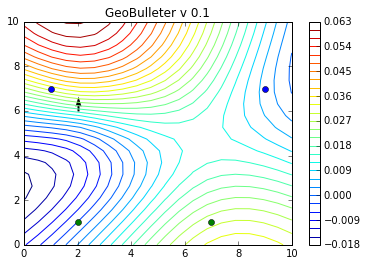

In [30]:
plot_this_crap("y")

In [436]:
a.value, b.value

(array(0.10701920239696941), array(-0.333750561144619))

In [293]:
test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,1,1,1,1,1,1)[1]

array([-0.000768337044092,  0.               ,  1.004993031164582, -0.050054543687209,  0.087380502617789])

In [440]:
c_sol

array([-0.075196085141021,  0.               ,  3.332649514816446,  1.377851079293249, -2.29594051924244 ])

In [50]:
h,j,k =sol[5,10,35], sol[25,5,5], sol[30,15,-25]
layer_1 = np.array([[1,5,7],[5,5,7],[6,5,7], [9,5,7]], dtype = "float32")

layer_2 = np.array([[1,5,1],[5,5,1],[9,5,1]], dtype = "float32")

print(sol[5,25,35], sol[25,25,35],  sol[30,25,35],  sol[45,25,35]) 
print(sol[5,25,5], sol[25,25,5],  sol[45,25,5])

6.05973 3.17981 2.4532 0.29113
6.14472 3.30846 0.500162


In [51]:
list(layer_1[0]*5)

[5.0, 25.0, 35.0]

In [52]:
interfaces_aux = test.geoMigueller(dips,dips_angles,azimuths,polarity,
                rest, ref)[0]


h = sol[10,20,30]# interfaces_aux[np.argmin(abs((test.grid - ref[0]).sum(1)))]
k = sol[30,15,25]# interfaces_aux[np.argmin(abs((test.grid - dips[0]).sum(1)))]
j = sol[45,25,5]#interfaces_aux[np.argmin(abs((test.grid - dips[-1]).sum(1)))]
h,k,j

(5.2851176, 2.330806, 0.50016159)

In [53]:
dips[-1], ref[0]

(array([ 6.,  3.,  5.], dtype=float32), array([ 1.,  5.,  7.], dtype=float32))

In [54]:
sol[30,15,25], sol[30,15,25]

(2.330806, 2.330806)

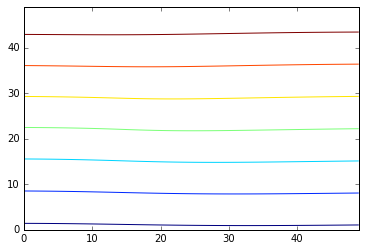

In [59]:
sol = test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref)[0].reshape(50,50,50, order = "C")
sol = np.swapaxes(sol,0,1)
plt.contour(sol[:,25,:].transpose())

In [121]:
"""Export model to VTK

Export the geology blocks to VTK for visualisation of the entire 3-D model in an
external VTK viewer, e.g. Paraview.

..Note:: Requires pyevtk, available for free on: https://github.com/firedrakeproject/firedrake/tree/master/python/evtk

**Optional keywords**:
    - *vtk_filename* = string : filename of VTK file (default: output_name)
    - *data* = np.array : data array to export to VKT (default: entire block model)
"""
vtk_filename = "noddyFunct2"

extent_x = 10
extent_y = 10
extent_z = 10

delx = 0.2
dely = 0.2
delz = 0.2
from pyevtk.hl import gridToVTK
# Coordinates
x = np.arange(0, extent_x + 0.1*delx, delx, dtype='float64')
y = np.arange(0, extent_y + 0.1*dely, dely, dtype='float64')
z = np.arange(0, extent_z + 0.1*delz, delz, dtype='float64')

# self.block = np.swapaxes(self.block, 0, 2)


gridToVTK(vtk_filename, x, y, z, cellData = {"geology" : sol})

ImportError: No module named 'pyevtk'

In [201]:
len(x)

51

In [202]:
surf_eq.min()

-63.0

In [203]:
np.min(z)

0.0

In [204]:
layers[0][:,0]

array([ 1.,  5.,  6.,  9.], dtype=float32)

In [168]:
G_x = np.sin(np.deg2rad(dips_angles)) * np.sin(np.deg2rad(azimuths)) * polarity
G_y = np.sin(np.deg2rad(dips_angles)) * np.cos(np.deg2rad(azimuths)) * polarity
G_z = np.cos(np.deg2rad(dips_angles)) * polarity

In [183]:
a

array([[ 2.  ,  6.  ],
       [ 2.03,  6.15]], dtype=float32)

In [ ]:
data = [trace1, trace2]
layout = go.Layout(
    xaxis=dict(
        range=[2, 5]
    ),
    yaxis=dict(
        range=[2, 5]
    )
)
fig = go.Figure(data=data, layout=layout)

In [ ]:
import lxml
lxml??

In [11]:
# Random Box

#layers = [np.random.uniform(0,10,(10,2)) for i in range(100)]
#dips = np.random.uniform(0,10, (60,2))
#dips_angles = np.random.normal(90,10, 60)
#rest = (np.vstack((i[1:] for i in layers)))
#ref = np.vstack((np.tile(i[0],(np.shape(i)[0]-1,1)) for i in layers))
#rest;

[[-30.  -29.5 -29.  ...,  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...,  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...,  28.5  29.   29.5]
 ..., 
 [-30.  -29.5 -29.  ...,  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...,  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...,  28.5  29.   29.5]]


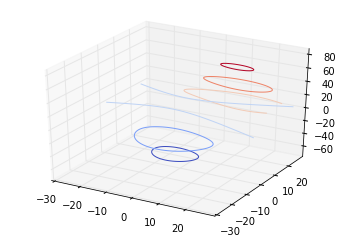

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
cset = ax.contour(X, Y, Z, cmap=cm.coolwarm)
ax.clabel(cset, fontsize=9, inline=1)
print(X)
plt.show()

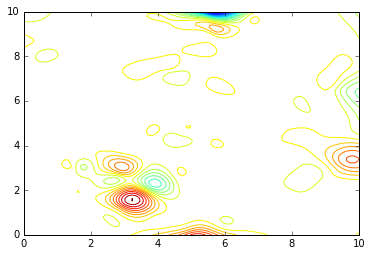

In [11]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.contour( sol.reshape(100,100) ,30,extent = (0,10,0,10) )

[ 2.  5.] [ 6.34  3.94] [[ 1.  7.]
 [ 5.  7.]
 [ 6.  7.]
 [ 9.  8.]]


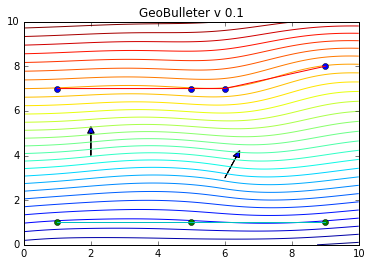

In [131]:
import matplotlib.pyplot as plt
% matplotlib inline
dip_pos_1_v = np.array([np.cos(np.deg2rad(dip_angle_1))*1,
                        np.sin(np.deg2rad(dip_angle_1))]) + dip_pos_1

dip_pos_2_v = np.array([np.cos(np.deg2rad(dip_angle_2))*1, 
                        np.sin(np.deg2rad(dip_angle_2))]) + dip_pos_2

plt.arrow(dip_pos_1[0],dip_pos_1[1], dip_pos_1_v[0]-dip_pos_1[0],
          dip_pos_1_v[1]-dip_pos_1[1], head_width = 0.2)
plt.arrow(dip_pos_2[0],dip_pos_2[1],dip_pos_2_v[0]-dip_pos_2[0], 
          dip_pos_2_v[1]-dip_pos_2[1], head_width = 0.2)

plt.plot(layer_1[:,0],layer_1[:,1], "o")
plt.plot(layer_2[:,0],layer_2[:,1], "o")

plt.plot(layer_1[:,0],layer_1[:,1], )
plt.plot(layer_2[:,0],layer_2[:,1], )

plt.contour( sol.reshape(100,100) ,30,extent = (0,10,0,10) )
#plt.colorbar()
#plt.xlim(0,10)
#plt.ylim(0,10)
plt.title("GeoBulleter v 0.1")
print (dip_pos_1_v, dip_pos_2_v, layer_1)

# CPU

In [17]:
%%timeit
sol = test.geoMigueller(dips,dips_angles,rest, ref)[0]

1 loop, best of 3: 5.81 s per loop


In [18]:
test.geoMigueller.profile.summary()

Function profiling
  Message: /home/miguel/PycharmProjects/GeMpy/GeoMig.py:562
  Time in 5 calls to Function.__call__: 2.937774e+01s
  Time in Function.fn.__call__: 2.937736e+01s (99.999%)
  Time in thunks: 2.934835e+01s (99.900%)
  Total compile time: 1.559712e+00s
    Number of Apply nodes: 171
    Theano Optimizer time: 1.410723e+00s
       Theano validate time: 4.508591e-02s
    Theano Linker time (includes C, CUDA code generation/compiling): 9.198022e-02s
       Import time 0.000000e+00s

Time in all call to theano.grad() 0.000000e+00s
Time since theano import 132.105s
Class
---
<% time> <sum %> <apply time> <time per call> <type> <#call> <#apply> <Class name>
  83.6%    83.6%      24.529s       1.29e-01s     C      190      38   theano.tensor.elemwise.Elemwise
   6.4%    90.0%       1.889s       5.40e-02s     C       35       7   theano.tensor.elemwise.Sum
   5.1%    95.1%       1.496s       2.99e-02s     C       50      10   theano.tensor.blas.Dot22Scalar
   2.5%    97.6%       

In [23]:
sys.path.append("/home/bl3/anaconda3/lib/python3.5/site-packages/PyEVTK-1.0.0-py3.5.egg_FILES/pyevtk")
nx = 50
ny = 50
nz = 50

xmin = 1
ymin = 1
zmin = 1
grid =  sol
var_name = "Geology"
#from evtk.hl import gridToVTK
import pyevtk
from pyevtk.hl import gridToVTK

# define coordinates
x = np.zeros(nx + 1)
y = np.zeros(ny + 1)
z = np.zeros(nz + 1)
x[1:] = np.cumsum(delx)
y[1:] = np.cumsum(dely)
z[1:] = np.cumsum(delz)



# plot in coordinates
x += xmin
y += ymin
z += zmin

print (len(x), x)
gridToVTK("GeoMigueller", x, y, z,
          cellData = {var_name: grid})

51 [ 1.   1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2
  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.2]


'/home/bl3/PycharmProjects/GeMpy/GeoMigueller.vtr'

## GPU

In [32]:
%%timeit
sol = test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref);

10 loops, best of 3: 19.3 ms per loop


In [33]:
test.geoMigueller.profile.summary()

Function profiling
  Message: /home/miguel/PycharmProjects/GeMpy/GeoMig.py:1346
  Time in 48 calls to Function.__call__: 1.300695e+00s
  Time in Function.fn.__call__: 1.296489e+00s (99.677%)
  Time in thunks: 1.084233e+00s (83.358%)
  Total compile time: 2.702078e+00s
    Number of Apply nodes: 295
    Theano Optimizer time: 2.239654e+00s
       Theano validate time: 1.687617e-01s
    Theano Linker time (includes C, CUDA code generation/compiling): 3.944879e-01s
       Import time 6.902671e-02s

Time in all call to theano.grad() 0.000000e+00s
Time since theano import 533.471s
Class
---
<% time> <sum %> <apply time> <time per call> <type> <#call> <#apply> <Class name>
  37.5%    37.5%       0.407s       3.14e-04s     C     1296      27   theano.tensor.elemwise.Elemwise
  26.3%    63.8%       0.285s       5.93e-04s     C      480      10   theano.tensor.blas.Dot22Scalar
   9.7%    73.5%       0.105s       9.96e-05s     C     1056      22   theano.sandbox.cuda.basic_ops.GpuFromHost
   9.0

In [30]:
importlib.reload(GeoMig)
test = GeoMig.GeoMigSim_pro2()

array([[ -5.88888884e-01,  -0.00000000e+00,  -0.00000000e+00, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [ -0.00000000e+00,  -5.88888884e-01,   4.42373231e-02, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [ -0.00000000e+00,   2.12696299e-01,  -5.88888884e-01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          2.00000000e+00,  -6.06459351e+02,  -6.13501053e+01],
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
         -6.06459351e+02,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -6.13501053e+01,   0.00000000e+00,   0.00000000e+00]], dtype=float32)

Exception: Can't change the value of this config parameter after initialization!

In [1]:
from theano import function, config, shared, sandbox
import theano.tensor as T
import numpy
import time

vlen = 10 * 30 * 768  # 10 x #cores x # threads per core
iters = 1000

rng = numpy.random.RandomState(22)
x = shared(numpy.asarray(rng.rand(vlen), config.floatX))
f = function([], T.exp(x))
print(f.maker.fgraph.toposort())
t0 = time.time()
for i in range(iters):
    r = f()
t1 = time.time()
print("Looping %d times took %f seconds" % (iters, t1 - t0))
print("Result is %s" % (r,))
if numpy.any([isinstance(x.op, T.Elemwise) for x in f.maker.fgraph.toposort()]):
    print('Used the cpu')
else:
    print('Used the gpu')

[Elemwise{exp,no_inplace}(<TensorType(float32, vector)>)]
Looping 1000 times took 2.271379 seconds
Result is [ 1.23178029  1.61879337  1.52278066 ...,  2.20771813  2.29967761
  1.62323284]
Used the cpu


In [1]:
from theano import function, config, shared, sandbox
import theano.tensor as T
import numpy
import time

vlen = 10 * 30 * 768  # 10 x #cores x # threads per core
iters = 1000

rng = numpy.random.RandomState(22)
x = shared(numpy.asarray(rng.rand(vlen), config.floatX))
f = function([], T.exp(x))
print(f.maker.fgraph.toposort())
t0 = time.time()
for i in range(iters):
    r = f()
t1 = time.time()
print("Looping %d times took %f seconds" % (iters, t1 - t0))
print("Result is %s" % (r,))
if numpy.any([isinstance(x.op, T.Elemwise) for x in f.maker.fgraph.toposort()]):
    print('Used the cpu')
else:
    print('Used the gpu')

Using gpu device 0: GeForce GTX 970 (CNMeM is disabled, cuDNN not available)


[GpuElemwise{exp,no_inplace}(<CudaNdarrayType(float32, vector)>), HostFromGpu(GpuElemwise{exp,no_inplace}.0)]
Looping 1000 times took 0.353415 seconds
Result is [ 1.23178029  1.61879349  1.52278066 ...,  2.20771813  2.29967761
  1.62323296]
Used the gpu


In [18]:
from theano import function, config, shared, sandbox
import theano.tensor as T
import numpy
import time

vlen = 10 * 30 * 768  # 10 x #cores x # threads per core
iters = 1000

rng = numpy.random.RandomState(22)
x = shared(numpy.asarray(rng.rand(vlen), config.floatX))
f = function([], T.exp(x))
print(f.maker.fgraph.toposort())
t0 = time.time()
for i in range(iters):
    r = f()
t1 = time.time()
print("Looping %d times took %f seconds" % (iters, t1 - t0))
print("Result is %s" % (r,))
if numpy.any([isinstance(x.op, T.Elemwise) for x in f.maker.fgraph.toposort()]):
    print('Used the cpu')
else:
    print('Used the gpu')

[Elemwise{exp,no_inplace}(<TensorType(float32, vector)>)]
Looping 1000 times took 2.291412 seconds
Result is [ 1.23178029  1.61879337  1.52278066 ...,  2.20771813  2.29967761
  1.62323284]
Used the cpu


In [759]:
np.set_printoptions(precision=2)
test.geoMigueller(dips,dips_angles,rest, ref)[1]

array([[-0.59,  0.08,  0.  ,  0.07],
       [ 0.08, -0.59,  0.07,  0.  ],
       [ 0.  ,  0.12, -0.59,  0.13],
       [ 0.07,  0.  ,  0.13, -0.59]])

In [751]:
T.fill_diagonal?

[ 2.5   4.87] [ 6.34  3.94] [[ 1.  7.]
 [ 5.  7.]
 [ 6.  7.]
 [ 9.  8.]]


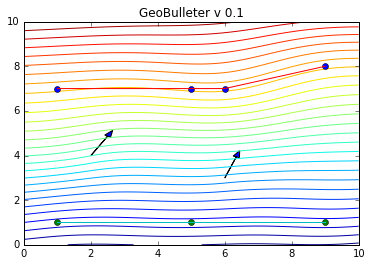

In [758]:
import matplotlib.pyplot as plt
% matplotlib inline
dip_pos_1_v = np.array([np.cos(np.deg2rad(dip_angle_1))*1,
                        np.sin(np.deg2rad(dip_angle_1))]) + dip_pos_1

dip_pos_2_v = np.array([np.cos(np.deg2rad(dip_angle_2))*1, 
                        np.sin(np.deg2rad(dip_angle_2))]) + dip_pos_2

plt.arrow(dip_pos_1[0],dip_pos_1[1], dip_pos_1_v[0]-dip_pos_1[0],
          dip_pos_1_v[1]-dip_pos_1[1], head_width = 0.2)
plt.arrow(dip_pos_2[0],dip_pos_2[1],dip_pos_2_v[0]-dip_pos_2[0], 
          dip_pos_2_v[1]-dip_pos_2[1], head_width = 0.2)

plt.plot(layer_1[:,0],layer_1[:,1], "o")
plt.plot(layer_2[:,0],layer_2[:,1], "o")

plt.plot(layer_1[:,0],layer_1[:,1], )
plt.plot(layer_2[:,0],layer_2[:,1], )

plt.contour( sol.reshape(50,50) ,30,extent = (0,10,0,10) )
#plt.colorbar()
#plt.xlim(0,10)
#plt.ylim(0,10)
plt.title("GeoBulleter v 0.1")
print (dip_pos_1_v, dip_pos_2_v, layer_1)

In [443]:
n = 10
#a = T.horizontal_stack(T.vertical_stack(T.ones(n),T.zeros(n)), T.vertical_stack(T.zeros(n), T.ones(n)))
a = T.zeros(n)

print (a.eval())
#U_G = T.horizontal_stack(([T.ones(n),T.zeros(n)],[T.zeros(n),T.ones(n)]))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [6]:
T.stack?ö+aeg

In [13]:
x_min = 0
x_max = 10
y_min = 0
y_max = 10
z_min = 0
z_max = 10
nx = 2
ny = 2
nz = 2

g = np.meshgrid(
    np.linspace(x_min, x_max, nx, dtype="float32"),
    np.linspace(y_min, y_max, ny, dtype="float32"),
    np.linspace(z_min, z_max, nz, dtype="float32"), indexing="ij"
)

np.vstack(map(np.ravel, g)).T.astype("float32")

array([[  0.,   0.,   0.],
       [  0.,   0.,  10.],
       [  0.,  10.,   0.],
       [  0.,  10.,  10.],
       [ 10.,   0.,   0.],
       [ 10.,   0.,  10.],
       [ 10.,  10.,   0.],
       [ 10.,  10.,  10.]], dtype=float32)

In [18]:
map(np.ravel, g)

In [22]:
np.ravel(g, order = "F")

array([  0.,   0.,   0.,  10.,   0.,   0.,   0.,  10.,   0.,  10.,  10.,   0.,   0.,   0.,  10.,  10.,   0.,  10.,   0.,  10.,
        10.,  10.,  10.,  10.])

In [23]:
g

[array([[[  0.,   0.],
         [  0.,   0.]],
 
        [[ 10.,  10.],
         [ 10.,  10.]]]), array([[[  0.,   0.],
         [ 10.,  10.]],
 
        [[  0.,   0.],
         [ 10.,  10.]]]), array([[[  0.,  10.],
         [  0.,  10.]],
 
        [[  0.,  10.],
         [  0.,  10.]]])]

In [25]:
np.transpose?

In [117]:
from scipy.optimize import basinhopping

In [ ]:
c_sol, test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,1,1,1,1,1,1)[1]

In [127]:
def func2d(x):
    
    return abs((test.geoMigueller(dips,dips_angles,azimuths,polarity, rest, ref,x[0],x[1],x[2],x[3],1,1)[1] - c_sol)).sum()

In [128]:
minimizer_kwargs = {"method": "BFGS"}
x0 = [0.1, 0.1,0.1,0.1]
ret = basinhopping(func2d, x0, minimizer_kwargs=minimizer_kwargs,
                  niter=200)

In [123]:
ret

                        fun: -26325.837920029033
 lowest_optimization_result:       fun: -26325.837920029033
 hess_inv: array([[ 12211.22635934347818 ,  -1374.047755962280917, -14883.117582870640035, -24109.312955044959381],
       [ -1374.047755962278188,    154.61242556224397 ,   1674.697844333543571,   2712.860007326877167],
       [-14883.117582870643673,   1674.697844333547209,  18139.6350127281803  ,  29384.57853619281741 ],
       [-24109.312955044926639,   2712.860007326878531,  29384.578536192773754,  47600.376477376055846]])
      jac: array([  1518942.1669921875  ,    352899.646484375   ,  11245071.89599609375 ,  -6192155.044189453125])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 252
      nit: 8
     njev: 40
   status: 2
  success: False
        x: array([-0.008996055884372,  0.036568881251827,  0.001147721169776, -0.004373523765337])
                    message: ['requested number of basinhopping iterations completed successfully'

In [126]:
ret

                        fun: 7.0816459405882703
 lowest_optimization_result:       fun: 7.0816459405882703
 hess_inv: array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])
      jac: array([ 0.              ,  0.              ,  0.              , -0.00000011920929])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([  29.484639742694483,  348.731163026955755,  347.179697899223981,  -12.600735818503411])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1218
                        nit: 200
                       njev: 203
                          x: array([  29.484639742694483,  348.731163026955755,  347.179697899223981,  -12.600735818503411])

In [129]:
ret

                        fun: 7.081645958178342
 lowest_optimization_result:       fun: 7.081645958178342
 hess_inv: array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])
      jac: array([ 0.               ,  0.               ,  0.               , -0.000000059604645])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([  33.417498862244003,  349.434134339166803,  345.652578789534402,  -14.182060542546683])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1218
                        nit: 200
                       njev: 203
                          x: array([  33.417498862244003,  349.434134339166803,  345.652578789534402,  -14.182060542546683])